In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Data Preprocessing
# Normalize the pixel values to the range 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Flatten the image data for the feedforward network
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)


In [5]:
# Define the Feedforward Neural Network model
model = models.Sequential()

# Add input layer (3072 input nodes for 32x32x3 flattened image)
model.add(layers.InputLayer(input_shape=(3072,)))

# Add hidden layers
model.add(layers.Dense(512, activation='relu'))  # First hidden layer
model.add(layers.Dense(256, activation='relu'))  # Second hidden layer
model.add(layers.Dense(128, activation='relu'))  # Third hidden layer

# Add output layer (10 output nodes for 10 classes)
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train_flat, y_train, epochs=20, batch_size=64, validation_data=(x_test_flat, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.2735 - loss: 1.9994 - val_accuracy: 0.3732 - val_loss: 1.7246
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.3939 - loss: 1.7004 - val_accuracy: 0.4272 - val_loss: 1.5915
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - accuracy: 0.4291 - loss: 1.5895 - val_accuracy: 0.4319 - val_loss: 1.5897
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.4528 - loss: 1.5311 - val_accuracy: 0.4596 - val_loss: 1.5061
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.4690 - loss: 1.4880 - val_accuracy: 0.4646 - val_loss: 1.5130
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.4836 - loss: 1.4464 - val_accuracy: 0.4732 - val_loss: 1.4789
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.4967 - loss: 1.4090 - val_accuracy: 0.4698 - val_loss: 1.4863
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5050 - loss: 1.3856 - 

In [8]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

313/313 - 1s - 4ms/step - accuracy: 0.5072 - loss: 1.4499
Test Accuracy: 0.5072000026702881


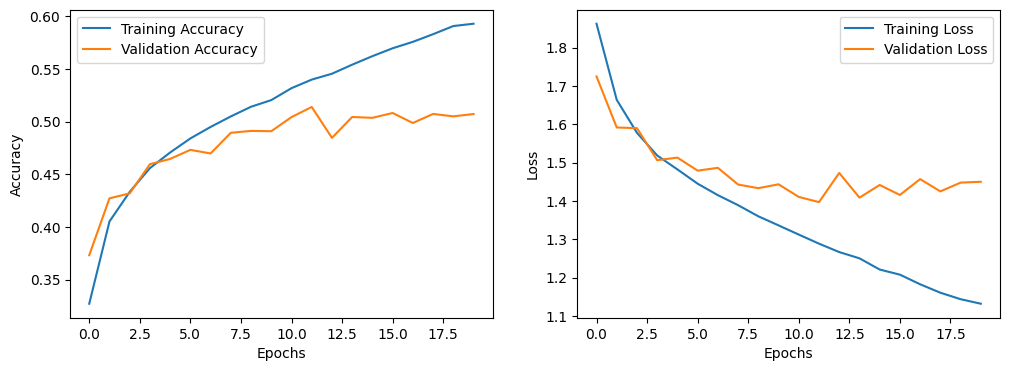

In [9]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()